<h1 style="color: #14549C">Distribución Binomial</h1>

### Introducción
<br>
<div style="text-align: justify">
El modelo de distribución binomial sirve para calcular la probabilidad de que variables aleatorias discretas (variables con números enteros) tomen determinados valores en ensayos que consisten en la observación de una secuencia de intentos idénticos e
independientes, cada uno de los cuales puede resultar en una de dos salidas: éxito o fracaso.
</div>

### Propiedades:
 1. Consiste en un número fijo, n, de pruebas idénticas.
 2. Cada prueba resulta en uno de dos resultados: éxito o fracaso.
 3. Dada una probabilidad de éxito, p, la probabilidad de fracaso, q, es igual a q = (1 – p).
 4. Las pruebas son independientes.
 5. La variable aleatoria de interés es X, el número de éxitos observado durante las n
pruebas.

### Definición
Se dice que una variable aleatoria $X$ tiene una distribución binomial basada en n pruebas
con probabilidad p de éxito si y sólo si:
> $ P(x)= {n \choose x} p^x q^{n-x}$
>
>donde: 
- $ x \in X $
- $x \in \mathbb{Z}$
- $ 0 \leq p \leq 1$

###  Propiedades adicionales de las distribuciones binomiales

| Propiedad | Ecuación / Fórmula | 
| --- | --- |
| Media | $\mu = np$ | 
| Varianza | $\sigma^2 = npq$ | 
| Desviación Estandar | ${\sigma} = {\sqrt{npq}}$ |  

In [1]:
#Librerias usadas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

## Ejemplo 1
Suponga que un lote de 5000 fusibles eléctricos contiene 5% de piezas defectuosas. Si se prueba una muestra de 5 fusibles. 
###### 1. Encuentre la probabilidad de encontrar 2 fusibles defectuosos.

In [2]:
#Datos
p = 0.05
q = 1 - p
x = 2
n = 5

#Cálculos
Px = scipy.special.comb(n,x) * pow(p,x) * pow(q, n-x)

#Resultado
print("La probabilidad de hallar 2 fusibles defectuosos es:", round(Px,5))

La probabilidad de hallar 2 fusibles defectuosos es: 0.02143


> Alternativamente, los cálculos de la probabilidad para este problema con el modelo binomial se pueden hacer de la siguiente manera:

In [3]:
#pmf = Probability mass function.
Px = scipy.stats.binom.pmf(x,n,p)
print("La probabilidad de hallar 2 fusibles defectuosos es:", round(Px,5))

La probabilidad de hallar 2 fusibles defectuosos es: 0.02143


###### 2.  Ahora, encuentre la probabildiad de hallar al menos 1 fusible defectuoso

> Nota. Este problema se resuelve recordando que:
>
> $P(X \geq 1) = 1- P(X=0) $

In [4]:
#Ahora el valor de x cambia
x = 0

#Cáclulos
Px = 1 - scipy.stats.binom.pmf(x,n,p)

#Resultado
print("La probabilidad de hallar al menos un fusible defectuoso es:", round(Px,5))

La probabilidad de hallar al menos un fusible defectuoso es: 0.22622


###### 3. Grafique la distribución binomial para el lote de 5000 unidades

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


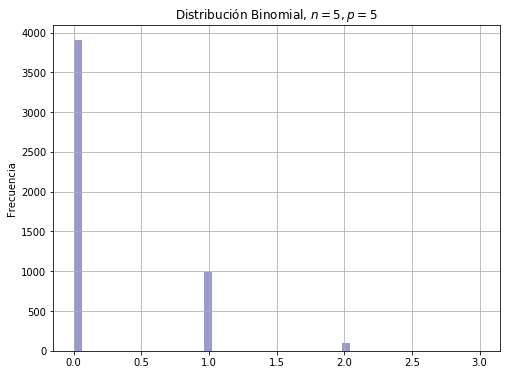

In [5]:
#rvs = Random variates
binom = scipy.stats.binom.rvs(n=5, p=0.05,size=5000)

#Gráfica
plt.figure(figsize=(8,6))
sns.distplot(binom, kde=False, color="darkblue")
plt.ylabel("Frecuencia")
plt.title("Distribución Binomial, $n=5, p = 5%$")
plt.grid()
plt.show()

## Ejemplo 2
Se supone que el voluminoso lote de fusibles eléctricos del Ejemplo 1 contiene sólo 5% de defectuosos. Si n = 20 fusibles se muestrean al azar de este lote, encuentre la probabilidad de que se
observen al menos cuatro defectuosos.

> $P(X \geq 4) = P(X=4) + P(X=5)+ ... + P(X=20) = \sum_{i=4}^{20} P(X=i)$
>
> Como la suma es demasiado grande, podemos recordar que:
>
> $P(X \geq 4) = 1 - P(X \leq 3)$
>
>
>Por lo tanto:
>
> $P(X \geq 4) = 1 - \sum_{i=0}^{3} P(X=i)$

In [6]:
#Datos
p = 0.05
q = 1 -p
n = 20
x = 3

#cdf = Cumulative density function
# cdf obtiene la distribucion binomial acumulada de 0 a x
Px = 1- scipy.stats.binom.cdf(x, n, p)
print("La probabilidad de hallar al menos 4 fusibles defectuosos es de:", round(Px,5))

La probabilidad de hallar al menos 4 fusibles defectuosos es de: 0.0159


> Para resolver este problema de la forma
>
> $P(X \geq 4) =  \sum_{i=4}^{20} P(X=i)$
> 
> se puede hacer asi:

In [8]:
p = 0.05
n = 20

#Cálculos
Px = 0
for i in range(4,n+1):
    Px = Px + scipy.stats.binom.pmf(i,n,p)

#Resultado
print("La probabilidad de hallar al menos 4 fusibles defectuosos es de:", round(Px,5))

La probabilidad de hallar al menos 4 fusibles defectuosos es de: 0.0159


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


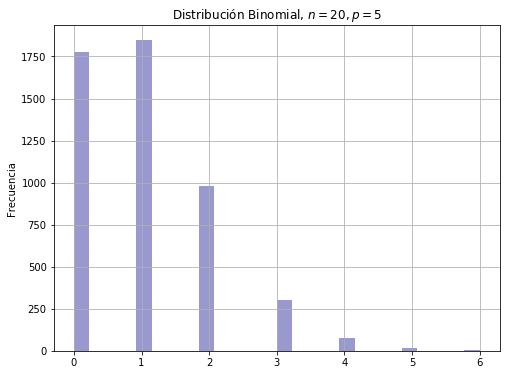

In [9]:
#Gráfica con muestra n=20


binom = scipy.stats.binom.rvs(n=20, p=0.05,size=5000)
#Gráfica
plt.figure(figsize=(8,6))
sns.distplot(binom, kde=False, color="darkblue")
plt.ylabel("Frecuencia")
plt.title("Distribución Binomial, $n=20, p = 5%$")
plt.grid()
plt.show()

### Fuentes:
- Duchesnay, Löfstedt & Younes (2019) Statistics (Chapter 4). Statistics and Machine Learning in Python (Release 0.3 beta).
- Scipy.org (2019) scipy.stats.binom. Consultado el 11 de junio de 2020 de: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
- Spiegel & Stephens (2009) La distribución binomial (Cap. 7) Estadística (Serie Schaum, 4ta Edición). CDMX. The McGraw-Hill.
- Wackerly, Mendenhall & Scheaffer (2010) La distribución de probabilidad binomial (Cap. 3). Estadística matemática con aplicaciones (7ma Edición). CDMX. Cengage Learning